# Peter Moss Acute Myeloid & Lymphoblastic Leukemia AI Research Project

## ALL FastAI VGG19 Classifier
**Using The ALL Image Database for Image Processing & The Leukemia Blood Cell Image Classification Using Convolutional Neural Network Research Paper**    



The ALL FastAI VGG19 Classifier was created by [Salvatore Raieli](https://github.com/salvatorera) based on his [Resnet50](https://github.com/AMLResearchProject/ALL-FastAI-2019/blob/master/Projects/ALL_FastAI_Resnet_50.ipynb) project. The classifier provides a Google Colab notebook that uses FastAI with Resnet18 and ALL_IDB2 from the [Acute Lymphoblastic Leukemia Image Database for Image Processing dataset](https://homes.di.unimi.it/scotti/all/).

## FastAI VGG19 Classifier Project Contributors

- [Salvatore Raieli](https://github.com/salvatorera "Salvatore Raieli") - PhD Immunolgy / Bioinformaticia, Bologna, Italy

&nbsp; 

## DISCLAIMER

These projects should be used for research purposes only. The purpose of the projects is to show the potential of Artificial Intelligence for medical support systems such as diagnosis systems.

Although the classifiers are accurate and show good results both on paper and in real world testing, they are not meant to be an alternative to professional medical diagnosis.

Salvatore Raieli is a bioinformatician researcher and PhD in Immunology, but does not work in medical diagnosis. Please use these systems responsibly.

Please use this system responsibly.

&nbsp; 

# ALL Image Database for Image Processing by Fabio Scotti

The [Acute Lymphoblastic Leukemia Image Database for Image Processing](https://homes.di.unimi.it/scotti/all/) dataset created by [Fabio Scotti, Associate Professor Dipartimento di Informatica, Università degli Studi di Milano](https://homes.di.unimi.it/scotti/) is used in this notebook.

Although in the [Leukemia Blood Cell Image Classification Using Convolutional Neural Network](http://www.ijcte.org/vol10/1198-H0012.pdf "Leukemia Blood Cell Image Classification Using Convolutional Neural Network") paper the ALL_IDB1 dataset is used, in this notebook you will use the ALL_IDB2 dataset. After removing 10 images per class for further testing and demonstrations, the dataset will be split into 80% and 20% for training and testing respectively.

# Clone the ALL FastAI 2020 repository

First of all you should clone the [ALL-FastAI-2020](https://github.com/AMLResearchProject/ALL-FastAI-2020 "ALL-FastAI-2020") repository from the [Peter Moss Acute Myeloid & Lymphoblastic Leukemia AI Research Project](https://github.com/AMLResearchProject "Peter Moss Acute Myeloid & Lymphoblastic Leukemia AI Research Project") Github Organization. 

To do this, make sure you have Git installed, navigate to the location you want to clone the repository to on your device using terminal/commandline, and then use the following command:

```
  $ git clone https://github.com/AMLResearchProject/ALL-FastAI-2020.git
```

Once you have used the command above you will see a directory called **ALL-FastAI-2020** in the location you chose to clone to. In terminal, navigate to the **ALL-FastAI-2020** directory, this is your project root directory.

# Google Drive / Colab
This tutorial assumes you have access to [Google Drive](https://www.google.com/drive/) with enough space to save the dataset and related files. It is also assumed that you have access to [Google Colab](https://colab.research.google.com).

## Import data to Google Drive
You need to import **ALL_IDB2** from the [Acute Lymphoblastic Leukemia Image Database for Image Processing dataset](https://homes.di.unimi.it/scotti/all/) dataset, to do this you need to request permission from Fabio Scotti, the creator of the dataset. You can request permission by following the steps provided on [this page](https://homes.di.unimi.it/scotti/all/#download). 

Once you have permission you need to upload the negative and positive examples provided in **ALL_IDB2** to your Google Drive. In this tutorial we assume you have uploaded your copy of the dataset to a folder located on your Google drive with the location: *AML-ALL-Classifiers/Python/_FastAI*. Once you have uploaded the dataset you can continue with this tutorial.

## Google Colab 

**You should now be running this tutorial on Google Colab, if not please read this tutorial from the beginning. **  

First we need import the Google Colab Drive library, mount our dataset drive from Google Drive, and set the path to the ALL_IDB2 folder on your drive. Run the following code block to do this. You will be asked to click a link that will authorize the application with the permissions it needs to mount your drive etc. Follow the steps and then past the authorization key into this application.

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
dataset_dir = "/content/gdrive/My Drive/fastai-v3/ALL_IDB2"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Import required libraries
We need to import the relevant FastAI libraries, running the following code block with do this and get the paths to the dataset files.

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
fileNames = get_image_files(dataset_dir)
fileNames[:5]

[PosixPath('/content/gdrive/My Drive/fastai-v3/ALL_IDB2/Im238_0.tif'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/ALL_IDB2/Im235_0.tif'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/ALL_IDB2/Im236_0.tif'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/ALL_IDB2/Im239_0.tif'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/ALL_IDB2/Im237_0.tif')]

# Import datset
Now we need to import the dataset into this notebook. run the following code blocks to import the ALL_IDB2 dataset as a FastAI [DataBunch](https://docs.fast.ai/basic_data.html#DataBunch). In the ImageDataBunch.from_name_re function we can see that we pass the *dataset_dir* we created earlier in the tutorial, fileNames that we created earlier,  pattern for the files, some augmentation, the size of the images we need to replicate VGG19 input sizes and the number of batches. 

For more information about getting datasets ready with FastAI you can check out [this article](https://docs.fast.ai/vision.data.html#Quickly-get-your-data-ready-for-training).

In [0]:
np.random.seed(2)
pattern = r'/\w+_(\d)\.tif$'

In [0]:
data = ImageDataBunch.from_name_re(dataset_dir, fileNames, pattern, ds_tfms=get_transforms(), 
                                   size=224, bs=32).normalize(imagenet_stats)
data

ImageDataBunch;

Train: LabelList (208 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,0,0,0,0
Path: /content/gdrive/My Drive/fastai-v3/ALL_IDB2;

Valid: LabelList (52 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
1,1,1,1,1
Path: /content/gdrive/My Drive/fastai-v3/ALL_IDB2;

Test: None

# data.show_batch()
Now we use the [data.show_batch()](https://docs.fast.ai/basic_data.html#DataBunch.show_batch) function to show a batch of our data. Run the following code block to do this and view the results.

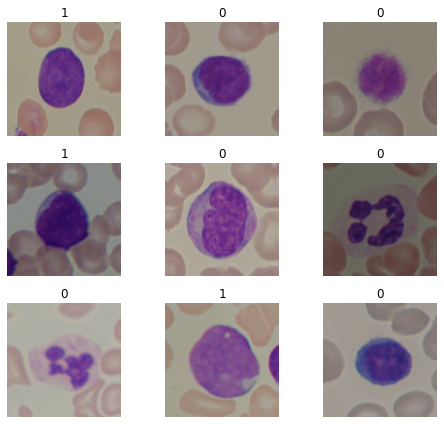

In [0]:
data.show_batch(rows=3, figsize=(7,6))

## View classes info
Now we can run the following code block which will print out the classes list and lengths.

## View classes info
Now we can run the following code block which will print out the classes list and lengths.

In [0]:
print(data.classes)
len(data.classes),data.c

['0', '1']


(2, 2)

# The VGG19 model

## What and why to use transfer learning?

Transfer learning is meaning use a pre-trained model to build our classifier. A pre-trained model is a model that has been previously trained on a dataset. The model comprehends the updated weights and bias.  Using pre-trained model you are saving time and computational resources. Another vantage is that pre-trained models often perform better that architecture designed from scratch. To better understand this point, suppose you want to build a classifier able to sort different sailboat types. A model pre-trained on ships would have already capture in its first layers some boat features, learning faster and with better accuracy among the different sailboat types.

## The VGG19 architecture

**VGG19** was proposed in the 2014  Visual Geometry Group (University of Oxford).  They proposed a very deep architecture with 16 (or 19) layers, which was at time much deeper than what has been used in the prior models. They used 3×3 filters in all convolutional layers (stride equal to 1) to reduce the number of the parameters in a network. In concrete, the are 16 convolutional layers, followed by 2 fully connected layers (4096 neurons in each of the two layers). Last layer is a dense layers (1000 neurons, each one represents one of the ImageNet categories). 

[Original research article](https://arxiv.org/pdf/1409.1556.pdf)

Test the VGG19 architecture with our dataset
Now we are going to test how the FastaAI implementation of VGG19 works with the ALL_IDB2 dataset.

Create the convolutional neural network
First we will create the convolutional neural network based on VGG19, to do this we can use the following code block which uses FastAI ( cnn_learner previously create_cnn) function. We pass the loaded data, specify the VGG19 model, pass error_rate & accuracy as a list for the metrics parameter specifying we want to see both error_rate and accuracy, and finally specify a weight decay of 1e-1 (1.0).

In [0]:
learn = cnn_learner(data, models.vgg19_bn, metrics=[error_rate,accuracy], wd=1e-1)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/checkpoints/vgg19_bn-c79401a0.pth


# learn.lr_find() & learn.recorder.plot()
Now we will use the [learn.lr_find()](https://docs.fast.ai/basic_train.html#lr_find) function to run LR Finder. LR Finder help to find the best learning rate to use with our network. For more information the [original paper](https://arxiv.org/pdf/1506.01186.pdf). 
As shown from the output of above,  [learn.recorder.plot()](https://docs.fast.ai/basic_train.html#Recorder.plot) function plot the loss over learning rate. Run the following code block to view the graph. The best learning rate should be chosen as the learning rate value where the curve is the steepest. You may try different learning rate values in order to pick up the best.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


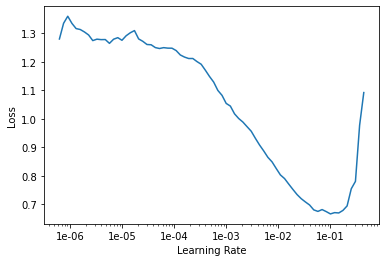

In [0]:
learn.lr_find()
learn.recorder.plot()

# learn.fit_one_cycle() & learn.recorder.plot_losses()
The [learn.fit_one_cycle()](https://docs.fast.ai/basic_train.html#fit_one_cycle) function can be used to fit the model. Fit one cycle reach a comparable accuracy faster than th *fit* function in training of complex models. Fit one cycle instead of maintain fix the learning rate during all the iterations is linearly increasing the learning rate and then it is decreasing again (this process is what is called one cycle). Moreover, this learning rate variation is helping in preventing overfitting. We use 5 for the parameter *cyc_len* to specify the number of cycles to run (on cycle can be considered equivalent to an epoch), and *max_lr* to specify the maximum learning rate to use which we set as *0.001*. Fit one cycle varies the learning rate from 10 fold less the maximum learning rate selected. For more information about fit one cycle: [article](https://arxiv.org/pdf/1803.09820.pdf). We then use [learn.recorder.plot_losses()](https://docs.fast.ai/basic_train.html#Recorder.plot_losses) to plot the losses from *fit_one_cycle* as a graph.

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.969793,0.712213,0.384615,0.615385,00:21
1,0.767179,0.501248,0.288462,0.711538,00:04
2,0.603896,0.318365,0.134615,0.865385,00:04
3,0.498923,0.239045,0.096154,0.903846,00:04
4,0.436613,0.187093,0.076923,0.923077,00:04


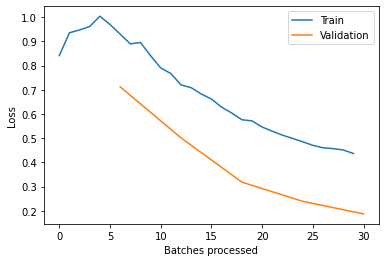

In [0]:
lr = 1e-3
learn.fit_one_cycle(cyc_len=5, max_lr=lr)
learn.recorder.plot_losses()

# Save the model

We can save the model once it has been trained.

In [0]:
learn.save('VGG19_model')

# learn.recorder.plot_lr()
We use  [learn.recorder.plot_lr()](https://docs.fast.ai/basic_train.html#Recorder.plot_lr) to plot the learning rate.

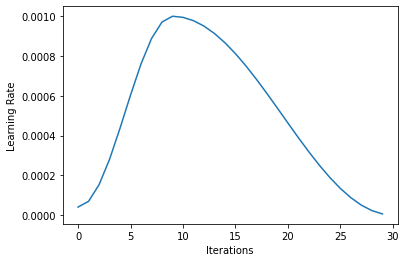

In [0]:
learn.recorder.plot_lr()

# ClassificationInterpretation()
We use  [ClassificationInterpretation()](https://docs.fast.ai/vision.learner.html#ClassificationInterpretation) to visualize interpretations of our model.

In [0]:
preds, y, losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

# interp.plot_top_losses()
We can use [interp.plot_top_losses()](https://docs.fast.ai/vision.learner.html#plot_top_losses) to view our top losses and their details.

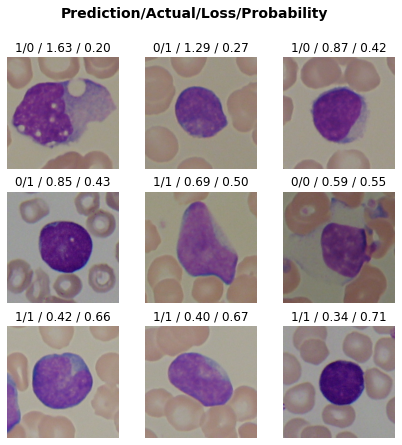

In [0]:
interp.plot_top_losses(9, figsize=(7,7))

# interp.plot_confusion_matrix()
Now we will use  [interp.plot_confusion_matrix()](https://docs.fast.ai/vision.learner.html#ClassificationInterpretation.plot_confusion_matrix) to display a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix). Below,  the top left square represents  true negatives, while the top right square represents false positives,  the bottom left square represents  false negatives, and in the bottom right represents  true positives.

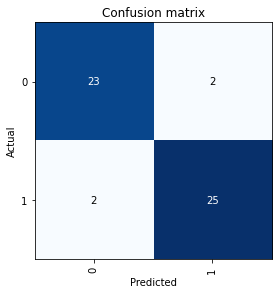

In [0]:
interp.plot_confusion_matrix()


# learn.unfreeze()
Next we use [learn.unfreeze()](https://docs.fast.ai/basic_train.html#Learner.unfreeze) to unfreeze the model. VGG19 model was trained on ImageNet to classify images among 1000 categories. None of these categories is a leukemia cell, for these reason when fast.ai *cnn_learner* function is behind line substituting the last layer with 2 other layers. The last layer is a matrix that has the same size of our data class (*data.c*). Before, we just trained these two layers while the other model's layers were still keeping the downloaded weight. Unfreezing our model allow us to train also these other layers and updates their weights.


In [0]:
learn.unfreeze()

# Train the entire (unfrozen) model
Now that we have unfrozen our model, we will use the following code blocks to train the whole model.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


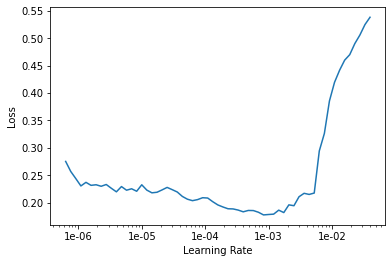

In [0]:
learn.lr_find()
learn.recorder.plot()

#Slice parameter

Initial layers are activated by simple patterns (like edge, lines, circles etc...)  while the following layers are acquiring the ability to recognize more sophisticated patterns. Update too much the weight of these layers would probably decrease our accuracy. The scope of transfer learning is to exploit this ability of a pre-trained model in recognizing particular patterns and to adapt to our dataset. The parameter *slice* allows to apply ** discriminative learning rate**. In other words, we apply a smaller learning rate (in this case, 1e-5) to the earlier layer and a higher learning rate to the last layer.

In [0]:
nlr = slice(1e-4, 1e-3)
learn.fit_one_cycle(5, nlr)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.305682,0.182922,0.096154,0.903846,00:05
1,0.238198,0.147088,0.076923,0.923077,00:06
2,0.193185,0.544437,0.115385,0.884615,00:06
3,0.209758,0.246752,0.096154,0.903846,00:05
4,0.176463,0.172874,0.076923,0.923077,00:05


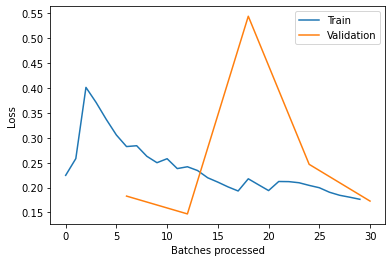

In [0]:
learn.recorder.plot_losses()

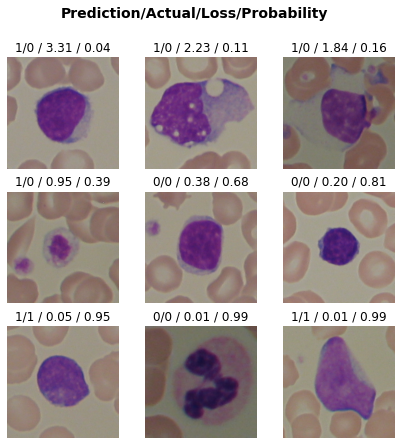

In [0]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_top_losses(9, figsize=(7,7))

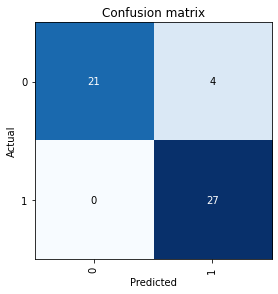

In [0]:
interp.plot_confusion_matrix()

# Save the model

We save our model after the un-freezing

In [0]:
learn.save('VGG19_unfreeze')

# Contributing

The Peter Moss Acute Myeloid & Lymphoblastic Leukemia AI Research project encourages and welcomes code contributions, bug fixes and enhancements from the Github.

Please read the [CONTRIBUTING](https://github.com/AMLResearchProject/ALL-FastAI-2019/blob/master/CONTRIBUTING.md "CONTRIBUTING") document for a full guide to forking our repositories and submitting your pull requests. You will also find information about our code of conduct on this page.

## Contributors

- [Salvatore Raieli](https://github.com/salvatorera "Salvatore Raieli") - [Peter Moss Leukemia AI Research](https://www.leukemiaresearchassociation.ai "Peter Moss Leukemia AI Research") & Biogenera, Bologna, Italy

&nbsp;

# Versioning

We use SemVer for versioning. For the versions available, see [Releases](https://github.com/AMLResearchProject/ALL-FastAI-2019/releases "Releases").

# License

This project is licensed under the **MIT License** - see the [LICENSE](https://github.com/AMLResearchProject/ALL-FastAI-2019/blob/master/LICENSE "LICENSE") file for details.

# Bugs/Issues

We use the [repo issues](https://github.com/AMLResearchProject/ALL-FastAI-2019/issues "repo issues") to track bugs and general requests related to using this project. See [CONTRIBUTING](https://github.com/AMLResearchProject/ALL-FastAI-2019/blob/master/CONTRIBUTING.md "CONTRIBUTING") for more info on how to submit bugs, feature requests and proposals.